In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('data/Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values

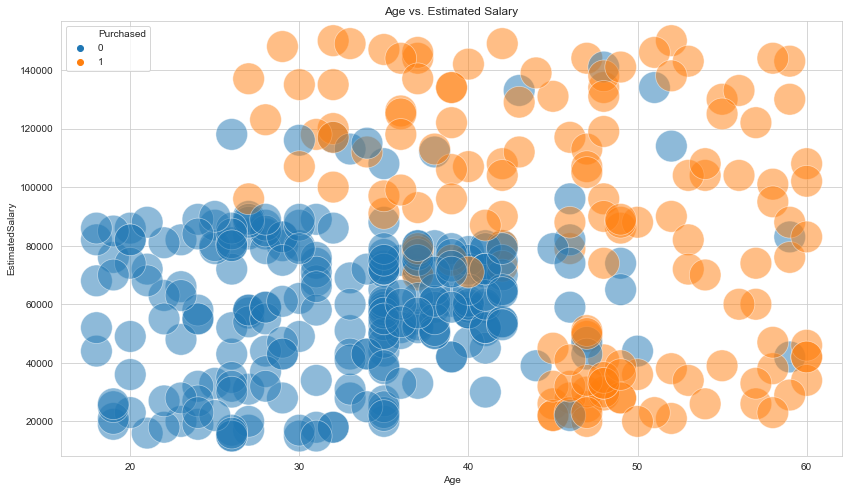

In [5]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue= 'Purchased', s=1000, alpha=.5)
plt.title('Age vs. Estimated Salary')
plt.show()

### Logistic Regression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_pred = clf_log.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[63  5]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.83      0.75      0.79        32

    accuracy                           0.87       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


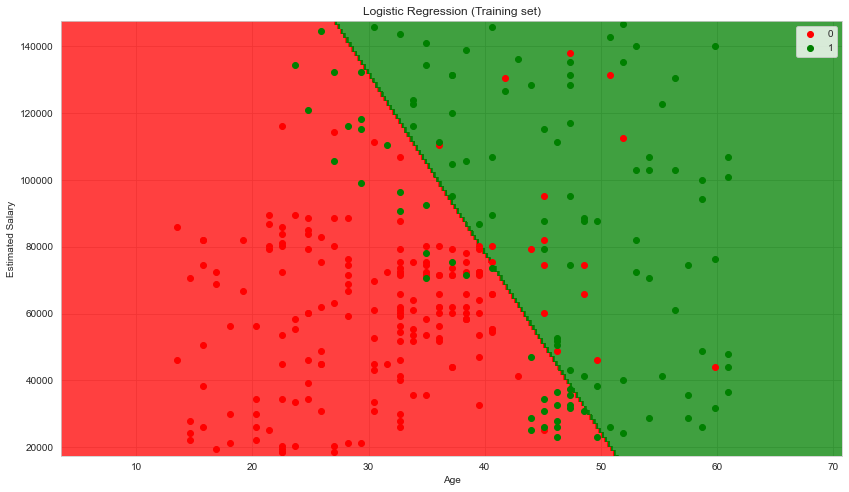

In [7]:
# Visualize the training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.figure(figsize=(14,8))
plt.contourf(X1, X2, clf_log.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


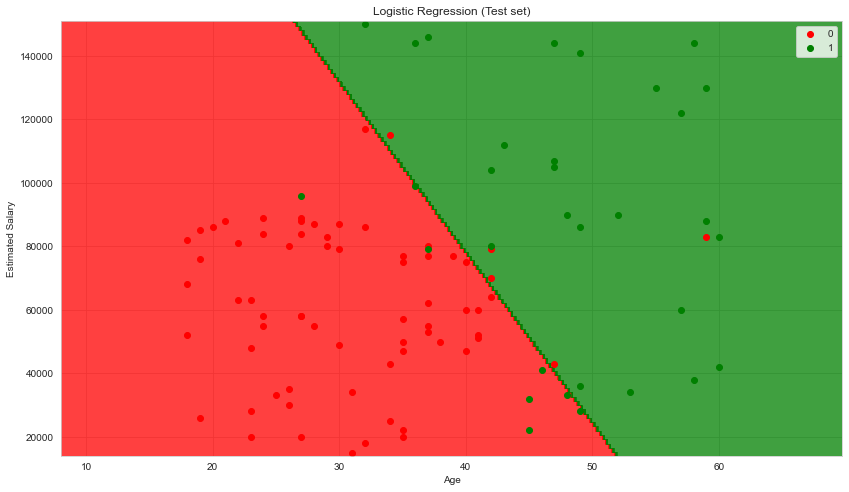

In [8]:
# Visualize the test set results
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.figure(figsize=(14,8))
plt.contourf(X1, X2, clf_log.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Logistic Regression w/ Cross Validation

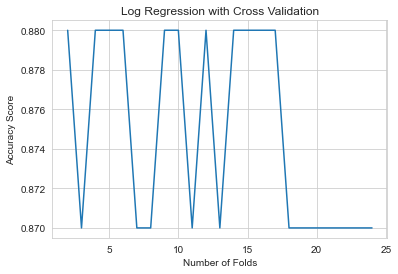

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

accuracy = []
for i in range(2,25):
    clf_log = LogisticRegressionCV(cv= i).fit(X_train, y_train)
    y_pred = clf_log.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

plt.xlabel('Number of Folds')
plt.ylabel('Accuracy Score')
plt.title('Log Regression with Cross Validation')
plt.plot(range(2,25), accuracy)
plt.show()

### K-nearest Neighbors - Un-scaled Features

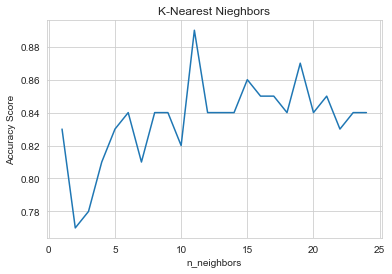

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

accuracy = []
for i in range(1,25):
    clf_knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred = clf_knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.title('K-Nearest Nieghbors')
plt.plot(range(1,25), accuracy)
plt.show()

### K-nearest Neighbors - Scaled Features

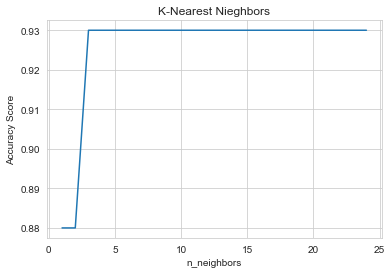

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

accuracy = []
for i in range(1,25):
    clf_knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred = clf_knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.title('K-Nearest Nieghbors')
plt.plot(range(1,25), accuracy)
plt.show()

### K-nearest Neighbors - Optimal Model n_neighbors = 3

In [12]:
# Select optimal n_neighbors for KNN model
clf_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### SVM w/ Linear Kernel & Default Parameters

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

clf_svm = SVC(kernel='linear').fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[63  5]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.83      0.78      0.81        32

    accuracy                           0.88       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100



### SVM w/ GridSearch

In [14]:
param_grid={'kernel':['linear','rbf','sigmoid'],
            'C':[0.1,1,10,100],
            'gamma':[1,0.1,0.01,0.001]}

grid = GridSearchCV(SVC(), param_grid, verbose=0)

grid.fit(X_train, y_train)

clf_svm = grid.best_estimator_.fit(X_train,y_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(grid.best_params_)

[[63  5]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.83      0.78      0.81        32

    accuracy                           0.88       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [15]:
# Perform another grid search around the optimal parameters found in the 1st grid search.
# Could repeat this code updating each iteration with the new values near the optimal parameters found each time.
param_grid={'kernel':['linear','rbf','sigmoid'],
            'C':[0.1,0.25,0.5,1,1.5,1.75],
            'gamma':[0.3,0.4,0.5,1,2,3,4]}

grid = GridSearchCV(SVC(), param_grid, verbose=0)

grid.fit(X_train, y_train)
clf_svm = grid.best_estimator_.fit(X_train,y_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(grid.best_params_)
# Not getting any improvement so stop after I've done a few iterations of tuning hyperparameters

[[63  5]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.83      0.78      0.81        32

    accuracy                           0.88       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100

{'C': 0.25, 'gamma': 1, 'kernel': 'rbf'}


### Naive Bayes

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

clf_nb = GaussianNB().fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[64  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


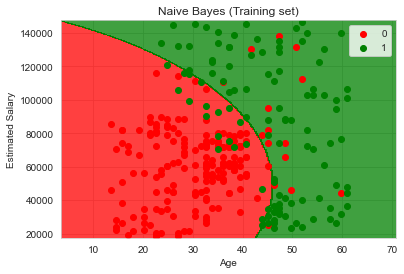

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


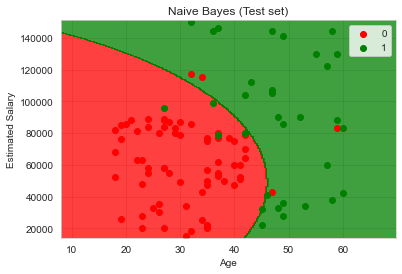

In [17]:
# Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clf_nb.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualize the test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clf_nb.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Decision Tree w/ entropy criterion

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
clf_tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[62  6]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



### Decision Tree w/ gini criterion

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
clf_tree = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### Decision Tree - examine max depth

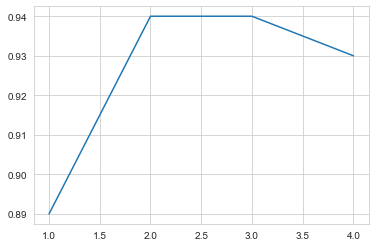

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

accuracy=[]
for i in range(1,5):
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(X_train, y_train)
    y_pred = clf_tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

plt.plot(range(1,5), accuracy)

### Random Forest

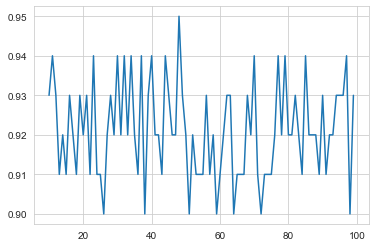

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

accuracy = []
for i in range(10,100):
    clf_rf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    
plt.plot(range(10,100), accuracy)

### Ensemble Method - Voting Classifier with the best models

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Used scaled data despite Random Forest performing worse with it.
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

clf_rf = RandomForestClassifier(n_estimators=45)
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_svm = SVC(kernel ='rbf',C=0.25)
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)

voting_clf = VotingClassifier(
    estimators=[('rf', clf_rf),('knn',clf_knn),('svm',clf_svm),('clf_tree', clf_tree)],
    voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (clf_rf, clf_knn, clf_svm, clf_tree, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.91
KNeighborsClassifier 0.93
SVC 0.93
DecisionTreeClassifier 0.94
VotingClassifier 0.93
